# Genshin Impact EDA ✨

## Imports necesarios

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

## Cargando el dataframe

In [27]:
# path = "/content/drive/MyDrive/genshin.csv"
path = "./genshin.csv"

# def load_paimon_data(): #lectura del fichero csv
#   return pd.read_csv(path,  encoding='utf-8')

El DataFrame proporcionado contiene muchas columnas con valores que no aportan mucho a la hora de realizar un analisis.
Por tanto, durante el analisis, a mayores de ajustes de datos, se eliminaran nulos, columnas innecesarias o cualquier valor que no tenga relevancia.

A continuacion, veremos que columnas contiene este dataset.


In [28]:
genshin = pd.read_csv(path, encoding='iso-8859-1')

genshin.columns

Index(['character_name', 'rarity', 'region', 'vision', 'arkhe', 'weapon_type',
       'model', 'constellation', 'birthday', 'special_dish', 'affiliation',
       'release_date', 'limited', 'voice_eng', 'voice_cn', 'voice_jp',
       'voice_kr', 'ascension', 'ascension_specialty', 'ascension_material',
       'ascension_boss', 'talent_material', 'talent_book_1-2',
       'talent_book_2-3', 'talent_book_3-4', 'talent_book_4-5',
       'talent_book_5-6', 'talent_book_6-7', 'talent_book_7-8',
       'talent_book_8-9', 'talent_book_9-10', 'talent_weekly', 'hp_90_90',
       'atk_90_90', 'def_90_90', 'hp_80_90', 'atk_80_90', 'def_80_90',
       'hp_80_80', 'atk_80_80', 'def_80_80', 'hp_70_80', 'atk_70_80',
       'def_70_80', 'hp_70_70', 'atk_70_70', 'def_70_70', 'hp_60_70',
       'atk_60_70', 'def_60_70', 'hp_60_60', 'atk_60_60', 'def_60_60',
       'hp_50_60', 'atk_50_60', 'def_50_60', 'hp_50_50', 'atk_50_50',
       'def_50_50', 'hp_40_50', 'atk_40_50', 'def_40_50', 'hp_40_40',
       'a

## Trabajando con los datos // Analisis de dataset

Hacemos un ejemplo para ver que hay en el DataFrame...  
Se planteará la eliminacion de las columnas relacionadas con la vida, atk o defensa (hp_1_20,atk_1_20,def_1_20 y siguientes), la columna arkhe hace referencia a los personajes de Fontaine con pneuma u osia, pero para la gran mayoria de personajes, que no lo son, dan valores nulos. Por tanto esa columna la eliminaremos.  
Existe tambien un personaje llamado Aloy que surgio tras una colaboracion con PlayStation y qe consta en este DataFrame, al no ser del mundo del Genshin, la mayoria de las columnas daran nulos para este personaje, por tanto se eliminara el personaje.

In [29]:
genshin.sample(5)

,character_name,rarity,region,vision,arkhe,weapon_type,model,constellation,birthday,special_dish,...,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
33,Kirara,4,Inazuma,Dendro,NaN,Sword,Medium Female,Arcella,22-Jan,Energizing Bento,...,1021,18,45,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%
14,Dehya,5,Sumeru,Pyro,NaN,Claymore,Tall Female,Mantichora,7-Apr,Goldflame Tajine,...,1220,20,48,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
6,Barbara,4,Mondstadt,Hydro,NaN,Catalyst,Medium Female,Crater,5-Jul,Spicy Stew,...,821,13,56,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%
26,Jean,5,Mondstadt,Anemo,NaN,Sword,Tall Female,Leo Minor,14-Mar,Invigorating Pizza,...,1144,19,60,0.0%,0.0%,5.5%,11.1%,11.1%,16.6%,22.2%
70,Venti,5,Mondstadt,Anemo,NaN,Bow,Medium Male,Carmen Dei,16-Jun,A Buoyant Breeze,...,820,20,52,0.0%,0.0%,8.0%,16.0%,16.0%,24.0%,32.0%


Como he dicho antes, Aloy es un personaje que ha salido de una colaboracion, por tanto no tiene relacion con el juego y provoca muchos valores nulos.

In [30]:
genshin[genshin["character_name"] == "Aloy"]

,character_name,rarity,region,vision,arkhe,weapon_type,model,constellation,birthday,special_dish,...,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
2,Aloy,5,NaN,Cryo,NaN,Bow,Medium Female,Nora Fortis,4-Apr,Satiety Gel,...,848,18,53,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%


## **Limpieza de datos**

Vamos a ver si nuestro dataset necesita hacer alguna limpieza de datos.

Crearemos un dataset solo con las columnas que nos interesan. **Este sera el dataset con el que trabajaremos.**

In [31]:
paimon= genshin[['character_name', 'rarity', 'region', 'vision', 'arkhe', 'weapon_type',
       'model', 'constellation', 'birthday', 'special_dish', 'affiliation',
       'release_date', 'limited',]]

**Eliminaremos a Aloy (personaje que no corresponde con el mundo del Genshin, y por tanto, es un personaje que no tiene sentido que esté)**

In [32]:
paimon = paimon[paimon['character_name'] != 'Aloy']

**Eliminaremos la columna arkhe, ya que corresponde a unicamente personajes de Fontaine, es un dato unico de ellos, y por tanto, es una columna con casi un 90% de valores nulos.**

In [33]:
paimon = paimon.drop('arkhe', axis = 1)

**Eliminamos el Traveler (nos cae mal)... mentira. En este dataset se contempla el Traveler con todas sus visiones, haciendo que sea un personaje que se repite 7 veces, por tanto no nos interesa.**

In [34]:
paimon = paimon.dropna(subset=['region'])

**Separemos por genero los personajes. En la columna de model, ademas de indicarnos su altura, tambien nos indica el genero, y por tanto podremos aprovecharnos para determinar el genero del personaje**


In [35]:
paimon['model'].unique()

array(['Medium Male', 'Tall Male', 'Medium Female', 'Tall Female',
       'Short Female'], dtype=object)

In [36]:
def gender(x):
    if 'Male' in x:
        return 'Male'
    elif 'Female' in x:
        return 'Female'
    else:
        return 'unknown'

#create gender column from model and gender function
paimon['gender'] = paimon['model'].apply(gender)

**Modificaremos el orden de las fechas de release de los personajes que intercambia el mes por el dia para mejor resultado luego.**

In [37]:
# paimon['release_date'] = paimon['release_date'].astype(str)

# def format_date(date_str):
#     parts = date_str.split("/")
#     return '/'.join([parts[0], parts[2]])

# paimon['release_date'] = paimon['release_date'].apply(format_date)

In [38]:
paimon["release_date"] = pd.to_datetime(paimon["release_date"])

paimon["release_month"] = paimon["release_date"].dt.month
paimon["release_year"] = paimon["release_date"].dt.year

paimon = paimon.drop("release_date", axis = 1)

/tmp/ipykernel_16093/3446269671.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Vemos como ha quedado todo...

In [39]:
paimon.sample(5)

,character_name,rarity,region,vision,weapon_type,model,constellation,birthday,special_dish,affiliation,limited,gender,release_month,release_year
70,Venti,5,Mondstadt,Anemo,Bow,Medium Male,Carmen Dei,16-Jun,A Buoyant Breeze,Mondstadt,True,Male,9,2020
37,Layla,4,Sumeru,Cryo,Sword,Medium Female,Luscinia,19-Dec,Extravagant Slumber,Rtawahist,False,Female,11,2022
20,Fischl,4,Mondstadt,Electro,Bow,Medium Female,Corvus,27-May,Die Heilige Sinfonie,Adventurers' Guild,False,Female,9,2020
75,Xingqiu,4,Liyue,Hydro,Sword,Medium Male,Fabulae Textile,9-Oct,All-Delicacy Parcels,Feiyun Commerce Guild,False,Male,9,2020
19,Faruzan,4,Sumeru,Anemo,Bow,Medium Female,Flosculi Implexi,20-Aug,Traditionally-Made Charcoal-Baked Ajilenakh Cake,Haravatat,False,Female,12,2023


In [40]:
paimon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 83
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   character_name  73 non-null     object
 1   rarity          73 non-null     int64 
 2   region          73 non-null     object
 3   vision          73 non-null     object
 4   weapon_type     73 non-null     object
 5   model           73 non-null     object
 6   constellation   73 non-null     object
 7   birthday        73 non-null     object
 8   special_dish    72 non-null     object
 9   affiliation     72 non-null     object
 10  limited         73 non-null     object
 11  gender          73 non-null     object
 12  release_month   73 non-null     int32 
 13  release_year    73 non-null     int32 
dtypes: int32(2), int64(1), object(11)
memory usage: 8.0+ KB


Veamos los valores que contienen algunas de estas columnas


In [41]:
print(f"Regiones de los personajes del dataset --> {pd.unique(paimon['region'])}")
print(f"Distintos tipos de armas --> {pd.unique(paimon['weapon_type'])}")
print(f"Visiones --> {pd.unique(paimon['vision'])}")

total_characters = paimon["character_name"].count()
print("Numero de personajes --> " + str(total_characters))

Regiones de los personajes del dataset --> ['Mondstadt' 'Sumeru' 'Inazuma' 'Liyue' 'Fontaine' 'Snezhnaya']
Distintos tipos de armas --> ['Sword' 'Bow' 'Claymore' 'Catalyst' 'Polearm']
Visiones --> ['Geo' 'Dendro' 'Pyro' 'Hydro' 'Electro' 'Cryo' 'Anemo']
Numero de personajes --> 73


## Guias de color

Vamos a hacer esto mucho mas visual, las regiones de este dataset tienen colores especiales en funcion de su elemento, asi que crearemos aqui las combinaciones de color para que sea mas intuitivo ver.

Las regiones o naciones tienen como color principal el elemento que emplean, pero puede que vivan en esa nacion personajes cuyo elemento es de otra nacion. Por tanto, aunque se declaren los dos colores, se mostrara el que sea mas conveniente.

In [42]:
region_colors = {
    'Mondstadt': '#54D8A8',
    'Liyue':  '#F7D45B',
    'Inazuma': '#CC90F5',
    'Sumeru': '#9ECF2A',
    'Fontaine':'#2CC5F3',
    'Snezhnaya': '#8BEEF1'
}

vision_colors = {
    'Anemo': '#54D8A8',
    'Geo':  '#F7D45B',
    'Electro': '#CC90F5',
    'Dendro': '#9ECF2A',
    'Hydro':'#2CC5F3',
    'Cryo': '#8BEEF1',
    'Pyro': '#E67829'
}

#**Visualizando datos**

Una vez limpiado los datos del dataset, vamos a analizar un poco algunos datos que considero interesantes. Para ello emplearemos librerias como Seaborn o [Plotly](https://plotly.com/python/)

## **Cuantos personajes hay por nacion?** ✨

Podemos visualizar **cuantos personajes son de cada region**, y como se puede ver en el esquema de abajo, la mayoria proceden tanto de Liyue como de Monstrad. Eso es debido a que al comienzo del juego eran las unicas regiones que habia, y por tanto, la gran mayoria de los personajes iniciales provenian de esos lugares.

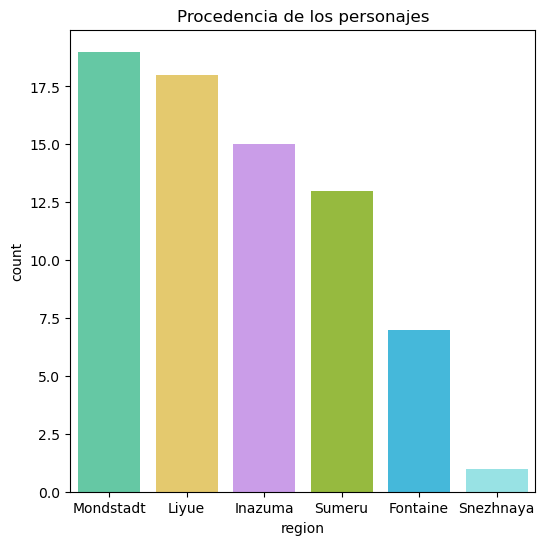

In [43]:
plt.figure(figsize = (6, 6))

sns.countplot(data=paimon, x='region', order=paimon['region'].value_counts().index, palette=region_colors.values())

plt.title('Procedencia de los personajes')

plt.show()

Otra manera de ver esta visualizacion es empleando el **pie chart** (ofrecido por plotly)

In [44]:
df_grouped = paimon.groupby('region').size().reset_index(name='count')

fig = px.pie(df_grouped, values='count', names='region', color='region',
              title="Procedencia de los personajes", color_discrete_map=region_colors, width=600, height=600)

fig.show()

## Naciones, visiones y personajes ✨

In [45]:
fig = go.Figure()

fig = px.sunburst(paimon, path=['region', 'vision', 'character_name'], values='rarity',
                  title="Naciones, visiones de los personajes", color='region',
                  color_discrete_map=region_colors, width=700, height=700)
fig.show()

## **Distribucion de los personajes en funcion de su genero (y vision)** ✨


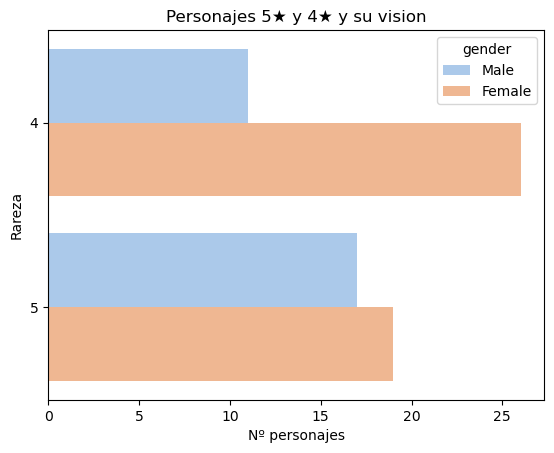

In [46]:
sns.countplot(y='rarity',data = paimon,hue='gender',palette = 'pastel')

plt.ylabel('Rareza')
plt.xlabel('Nº personajes')

plt.title("Personajes 5★ y 4★ y su vision")

plt.show()

## **Tipos de armas en funcion del genero de los personajes** ✨

<Axes: xlabel='count', ylabel='weapon_type'>

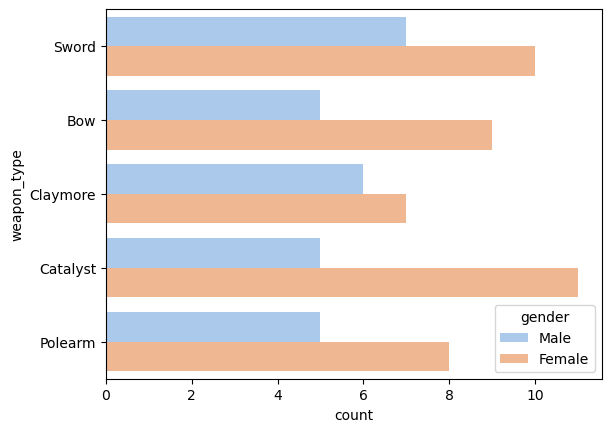

In [47]:
sns.countplot(y='weapon_type',data = paimon,hue='gender',palette = 'pastel')

## **Lanzamientos por mes, separados por año** ✨


Podemos intentar hacer un diagrama visual en el que veremos los personajes que lanzaron durante estos tres años de juego.

A simple vista se ve que al comienzo del juego salieron muchos personajes, y durante el paso de los meses, solo salen 3 personajes como maximo.

In [48]:
paimon['release_month'] = paimon['release_month'].astype(int)

paimon_sorted = paimon.sort_values(by=['release_year', 'release_month'])

for year, year_data in paimon_sorted.groupby("release_year"):
    release_counts = year_data["release_month"].value_counts().sort_index().astype(int)

    fig = px.line(x=release_counts.index, y=release_counts.values)
    fig.update_layout(
      title=f'Lanzamientos por Mes - Año {year}',
      width=700,
      height=600,
      xaxis_title='Mes',
      yaxis_title='Lanzamientos'
    )
    fig.show()